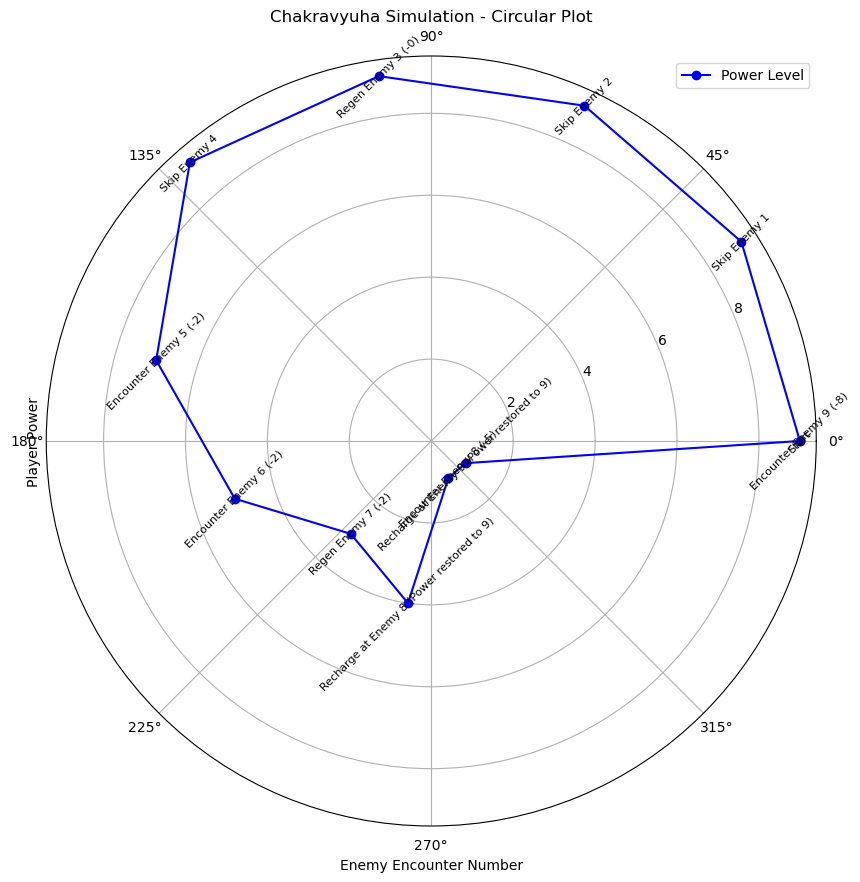

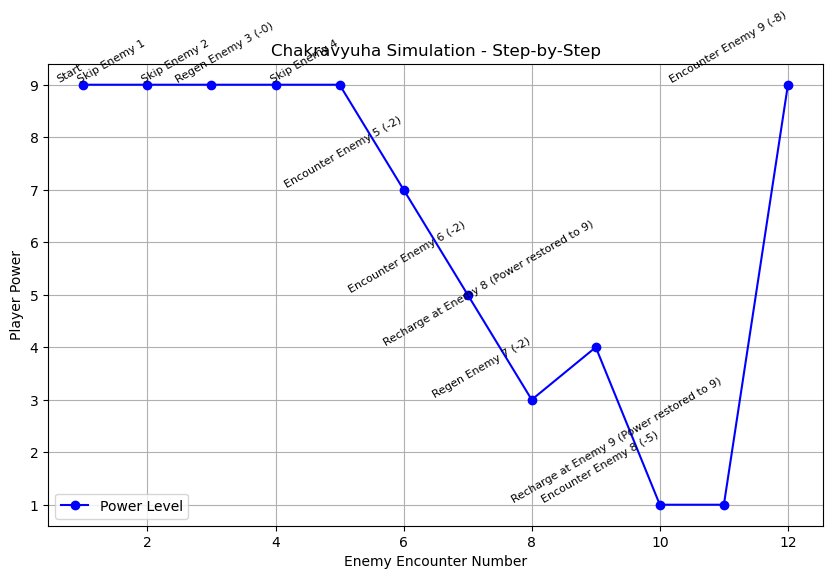

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def can_cross_chakravyuha(p, enemies, a, b):
    """
    Simulate the Chakravyuha scenario with given parameters and plot the results.
    
    Parameters:
    - p: Initial power of the player
    - enemies: List of enemies with their power levels
    - a: Number of skips available
    - b: Number of recharges available
    
    Returns:
    - A tuple (success, power_levels, events) where:
      - success: Boolean indicating if the player can cross the Chakravyuha
      - power_levels: List of power levels after each encounter
      - events: List of events that occurred during the simulation
    """
    initial_power = p
    skips_remaining = a
    recharges_remaining = b

    # Enemies with regenerating power
    regen_enemies = {3, 7}
    regen_used = {3: False, 7: False}
    
    # Data to track power levels and events for plotting
    power_levels = [p]
    events = ['Start']  # Track events like skips, recharges, etc.
    
    for i in range(1, len(enemies) + 1):
        # Regenerating enemy logic
        if i in regen_enemies and not regen_used[i]:
            p -= enemies[i-1] // 2
            regen_used[i] = True
            events.append(f'Regen Enemy {i} (-{enemies[i-1] // 2})')
        else:
            # Check for skip
            if skips_remaining > 0:
                skips_remaining -= 1
                events.append(f'Skip Enemy {i}')
                power_levels.append(p)  # Power remains the same
                continue

            # Check for recharge
            if recharges_remaining > 0 and p < enemies[i-1]:
                p = initial_power
                recharges_remaining -= 1
                events.append(f'Recharge at Enemy {i} (Power restored to {initial_power})')

            # Regular enemy encounter
            if p < enemies[i-1]:
                events.append(f'Failed at Enemy {i}')
                power_levels.append(p)
                return False, power_levels, events

            p -= enemies[i-1]
            events.append(f'Encounter Enemy {i} (-{enemies[i-1]})')

        # Check if power goes below zero
        if p < 0:
            events.append(f'Failed after Enemy {i}')
            power_levels.append(p)
            return False, power_levels, events

        # Append power level after each encounter
        power_levels.append(p)

    return True, power_levels, events

# Test case
p1 = 9
enemies1 = [1, 1, 1, 2, 2, 2, 5, 5, 8, 2, 3, 1]
a1 = 3
b1 = 2
result1, power_levels1, events1 = can_cross_chakravyuha(p1, enemies1, a1, b1)

# Convert to polar coordinates
angles = np.linspace(0, 2 * np.pi, len(power_levels1), endpoint=False).tolist()
angles += angles[:1]  # To make the plot circular
power_levels1 += power_levels1[:1]  # To make the plot circular

# Plotting the results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, power_levels1, marker='o', linestyle='-', color='b', label='Power Level')

# Annotate the events on the plot
for i, (event, power) in enumerate(zip(events1, power_levels1)):
    ax.text(angles[i], power, event, fontsize=8, ha='center', va='center', rotation=45, rotation_mode='anchor')

ax.set_title('Chakravyuha Simulation - Circular Plot')
ax.set_xlabel('Enemy Encounter Number')
ax.set_ylabel('Player Power')
ax.grid(True)
ax.legend()
plt.show()


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(power_levels1) + 1), power_levels1, marker='o', linestyle='-', color='b', label='Power Level')

# Annotate the events on the plot
for i, (event, power) in enumerate(zip(events1, power_levels1), 1):
    plt.text(i, power, event, fontsize=8, ha='right', va='bottom', rotation=30)

plt.title('Chakravyuha Simulation - Step-by-Step')
plt.xlabel('Enemy Encounter Number')
plt.ylabel('Player Power')
plt.grid(True)
plt.legend()
plt.show()